<a href="https://colab.research.google.com/github/lucianarochacosta/data-science-DIO/blob/main/pandas_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando a biblioteca
import pandas as pd

In [2]:
#Leitura dos arquivos de excel
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [3]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
#Exibindo as cinco primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#Exibindo as cinco ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [11]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Criando colunas novas**

In [12]:
#Criando coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [14]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [16]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [18]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [19]:
#nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [20]:
#nsmallest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [21]:
#Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [22]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [23]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [24]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [25]:
#Tranformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [27]:
#Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [28]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [29]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
185,Salvador,2019-01-02,6.67,1036,1,6.67,1.0,2019
24,Aracaju,2018-01-01,151.04,1522,6,906.24,6.0,2018
54,Salvador,2019-01-01,46.54,1037,3,139.62,3.0,2019
6,Natal,2018-07-02,322.00,852,4,1288.00,4.0,2018
159,Salvador,2019-01-02,172.52,1035,1,172.52,1.0,2019


In [30]:
#Extraindo o dia e o mes
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
224,Natal,2019-01-02,178.30,1035,3,534.90,3.0,2019,1,2
77,Aracaju,2018-01-01,24.10,1522,1,24.10,1.0,2018,1,1
6,Fortaleza,2019-01-01,38.40,1003,4,153.60,4.0,2019,1,1
147,Natal,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2
94,Salvador,2019-01-01,33.24,1037,1,33.24,1.0,2019,1,1


In [32]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [33]:
#Calculando a diferenca de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [34]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days
223,Salvador,2019-01-02,40.51,1037,2,81.02,2.0,2019,1,2,366 days
3,Recife,2019-02-10,160.54,981,3,481.62,3.0,2019,2,10,405 days


In [37]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [38]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
128,Fortaleza,2019-03-02,38.70,982,4,154.8,4.0,2019,3,2,425 days,1,1
63,Recife,2019-01-01,37.95,980,2,75.9,2.0,2019,1,1,365 days,1,1
69,Fortaleza,2019-01-01,216.65,1003,6,1299.9,6.0,2019,1,1,365 days,1,1


In [47]:
#Filtrando as vendas de 2019 do mes de marco
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [48]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1,1


In [51]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
116,Recife,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019,3,2,425 days,1,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1,1
141,Salvador,2019-03-02,9.08,1036,1,9.08,1.0,2019,3,2,425 days,1,1
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2.0,2019,3,2,425 days,1,1


**Visualização de dados**

In [52]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

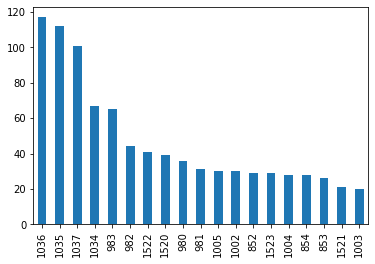

In [54]:
#Grafico de barras matplotlib
df["LojaID"].value_counts(ascending=False).plot.bar()

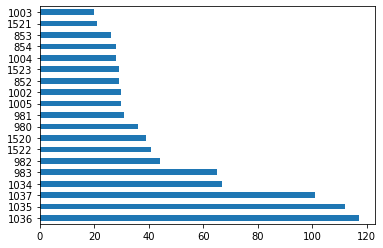

In [55]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

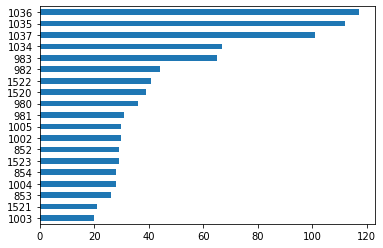

In [57]:
df["LojaID"].value_counts(ascending=True).plot.barh();

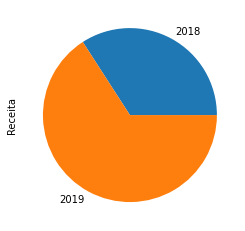

In [60]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [61]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

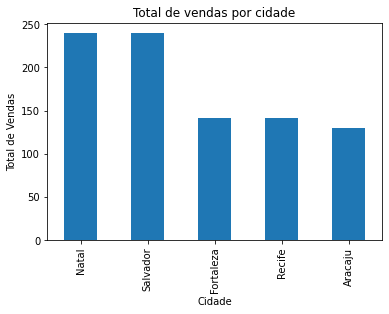

In [62]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

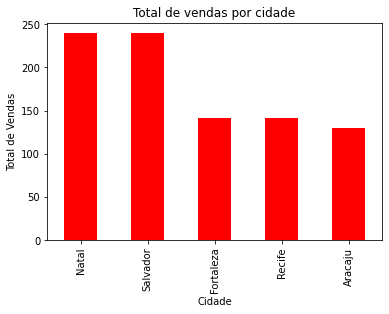

In [63]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [64]:
#Alterando o estilo
plt.style.use("ggplot")

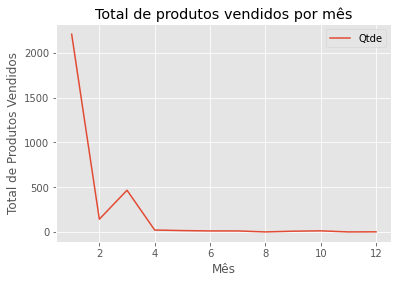

In [66]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [67]:
#Selecionando apenas o ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

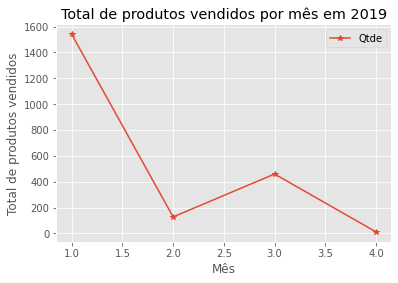

In [69]:
#Total de produtos vendidos por mes em 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês em 2019", marker="*")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

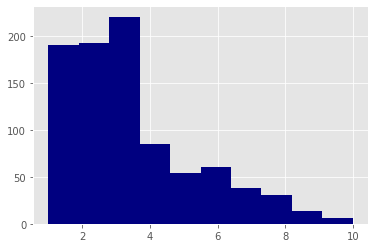

In [71]:
#Histograma
plt.hist(df["Qtde"], color="navy");

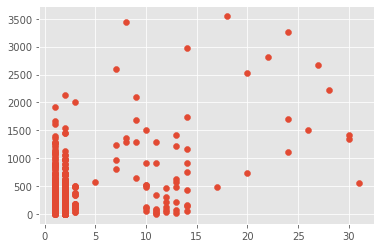

In [72]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

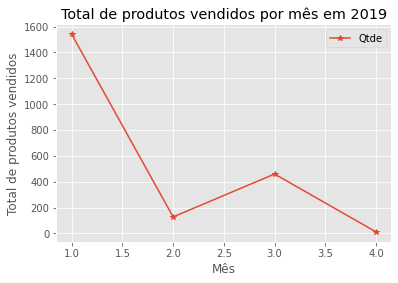

In [73]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês em 2019", marker="*")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("graficoQTDExMES.png");